In [1]:
import pandas as pd
import numpy as np
import scipy 
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
exchange = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit6/DEXMXUS.csv')
print(exchange.shape)
exchange.head()

(1304, 2)


,DATE,DEXMXUS
0,2014-01-21,13.2970
1,2014-01-22,13.3180
2,2014-01-23,13.3785
3,2014-01-24,13.4560
4,2014-01-27,13.4450


In [11]:
exchange.dropna(inplace=True)
exchange['rate'] = pd.to_numeric(exchange.DEXMXUS, errors='coerce')
exchange.DATE = pd.to_datetime(exchange.DATE)

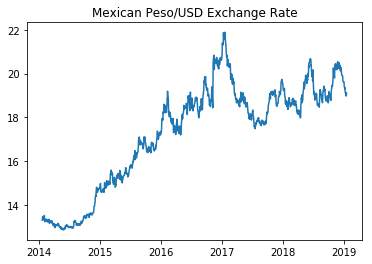

In [14]:
plt.plot(exchange['DATE'],exchange['rate'])
plt.title('Mexican Peso/USD Exchange Rate')
plt.show()

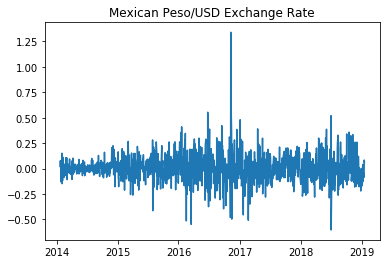

In [17]:
exchange['rate_diff'] = exchange['rate'] - exchange['rate'].shift()
plt.plot(exchange['DATE'], exchange['rate_diff'])
plt.title('Mexican Peso/USD Exchange Rate')
plt.show()

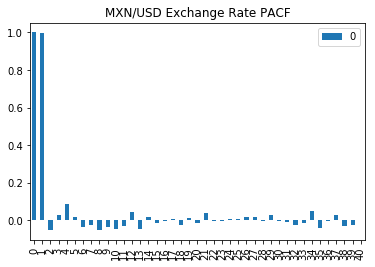

In [21]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(exchange.rate))
x_acf.plot(kind='bar')
plt.title("MXN/USD Exchange Rate PACF")
plt.show()

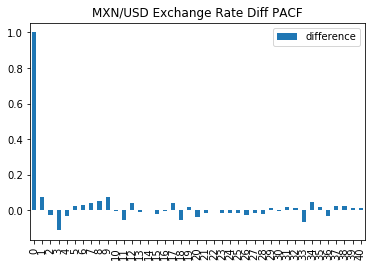

In [20]:
x_acf = pd.DataFrame(pacf(exchange.rate_diff[1:]))
x_acf.plot(kind='bar')
plt.title("MXN/USD Exchange Rate Diff PACF")
plt.legend(['difference'])
plt.show()

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.rate, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.rate, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                 1249
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 719.109
Method:                       css-mle   S.D. of innovations              0.136
Date:                Sun, 27 Jan 2019   AIC                          -1432.219
Time:                        13:14:02   BIC                          -1416.829
Sample:                             1   HQIC                         -1426.433
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0047      0.004      1.121      0.263      -0.003       0.013
ar.L1.D.rate     0.0744      0.028      2.637      0.008       0.019       0.130
                                    Roots   

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.rate, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                   rate   No. Observations:                 1250
Model:                     ARMA(1, 1)   Log Likelihood                 716.615
Method:                       css-mle   S.D. of innovations              0.136
Date:                Sun, 27 Jan 2019   AIC                          -1425.229
Time:                        13:16:53   BIC                          -1404.706
Sample:                             0   HQIC                         -1417.514
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7182      1.889      8.848      0.000      13.015      20.421
ar.L1.rate     0.9984      0.001    737.307      0.000       0.996       1.001
ma.L1.rate     0.0777      0.028      2.769      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [37]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(exchange.rate, order=(10,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                 1249
Model:                ARIMA(10, 1, 1)   Log Likelihood                 736.680
Method:                       css-mle   S.D. of innovations              0.134
Date:                Sun, 27 Jan 2019   AIC                          -1447.361
Time:                        16:26:55   BIC                          -1380.670
Sample:                             1   HQIC                         -1422.288
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0051      0.003      1.993      0.046    8.42e-05       0.010
ar.L1.D.rate      1.0434      0.033     31.848      0.000       0.979       1.108
ar.L2.D.rate     -0.0804      0.041     

In [33]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
model_511 = ARIMA(exchange.rate, order=(5,1,1))
model_fit_511 = model_511.fit(disp=0)
print(model_fit_511.summary())
print('Residuals Description')
print(model_fit_511.resid.describe())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                 1249
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 731.041
Method:                       css-mle   S.D. of innovations              0.135
Date:                Sun, 27 Jan 2019   AIC                          -1446.083
Time:                        16:09:51   BIC                          -1405.042
Sample:                             1   HQIC                         -1430.654
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0046      0.004      1.076      0.282      -0.004       0.013
ar.L1.D.rate     0.8413      0.102      8.277      0.000       0.642       1.041
ar.L2.D.rate    -0.0670      0.038     -1.77

Text(0.5,1,'Histogram of Residuals')

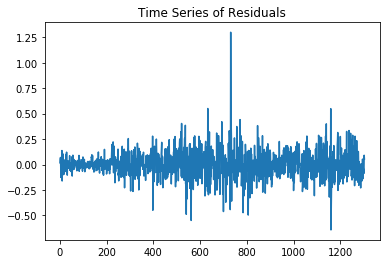

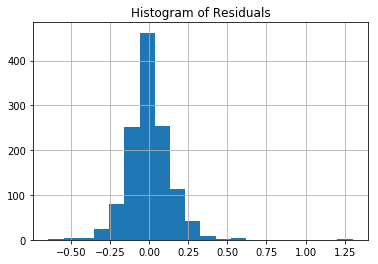

In [30]:
residuals = pd.DataFrame(model_fit_511.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The Mexican peso to US dollar conversion rate was modeled using ARIMA.  Above you will see different summary results for varying values of p, q, and d.  